In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

%matplotlib inline
sns.set(rc={"figure.figsize": (10, 7)})


In [2]:
iris = pd.read_csv(
    "https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
iris_test = pd.read_csv(
    "https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)
np.random.seed(0)



In [3]:
iris.head()


,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [4]:
X_train = iris.drop(["species"], axis=1)
y_train = iris.species

X_test = iris_test.drop(["species"], axis=1)
y_test = iris_test.species


In [5]:
len_range = 100 + 1
tree_depth_set = range(1, len_range)
tmp_score_data = {"max_depth": list(range(1, len_range)),
                  "cross_val_score": [],
                  "test_score": [], }
for max_deep in tree_depth_set:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_deep)

    clf.fit(X_train, y_train)

    test_score = clf.score(X_test, y_test)
    mean_cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()

    tmp_score_data["cross_val_score"].append(mean_cross_val)
    tmp_score_data["test_score"].append(test_score)


In [6]:
scores_data = pd.DataFrame(tmp_score_data)
scores_data.head()

,max_depth,cross_val_score,test_score
0,1,0.70,0.60
1,2,0.95,0.94
2,3,0.96,0.94
3,4,0.96,0.94
4,5,0.96,0.92


In [7]:
scores_data_long = pd.melt(scores_data,
                           id_vars=["max_depth"],
                           value_vars=["cross_val_score", "test_score"],
                           var_name="set_type",
                           value_name="score")

In [8]:
scores_data_long.head()

,max_depth,set_type,score
0,1,cross_val_score,0.70
1,2,cross_val_score,0.95
2,3,cross_val_score,0.96
3,4,cross_val_score,0.96
4,5,cross_val_score,0.96


<AxesSubplot:xlabel='max_depth', ylabel='score'>

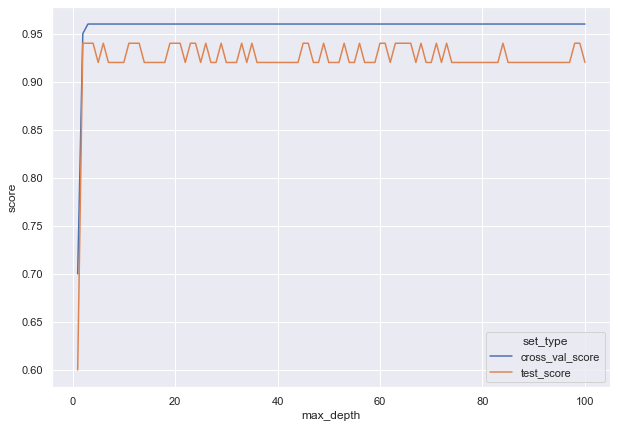

In [9]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [10]:
data = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")
data.tail()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик
999,11,4.4,1,0,1,котик


In [11]:
d = {"собачка": 1, "котик": 0}
data["Вид"] = data["Вид"].map(d)
data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1
...,...,...,...,...,...,...
995,8,3.2,1,0,1,0
996,7,2.8,1,0,1,0
997,6,2.4,1,0,1,0
998,7,2.8,1,0,1,0


In [12]:
# 1 - Dog, 0 - Cat
data = pd.get_dummies(data, drop_first=1)
data.rename({"Вид_собачка": "Вид"}, axis=1, inplace=True)
data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,1
1,20,24.0,1,0,0,1
2,34,40.8,1,1,0,1
3,26,31.2,1,1,0,1
4,16,19.2,1,1,0,1


In [13]:
X = data.drop("Вид", axis=1)
y = data["Вид"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
287,30,36.0,1,1,0
779,14,5.6,1,1,1
64,34,40.8,1,1,0
988,8,3.2,1,0,1
466,18,21.6,1,1,0


In [15]:
y_train.head()

287    1
779    0
64     1
988    0
466    1
Name: Вид, dtype: int64

In [16]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


1.0

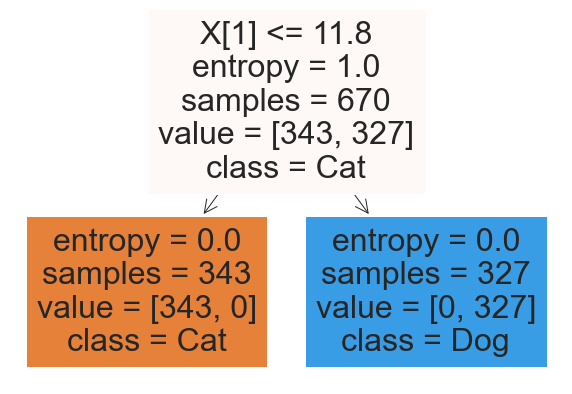

In [17]:
plot_tree(clf,
          filled=True,
          class_names=["Cat", "Dog"])
None

In [18]:
test_data = pd.read_json("D:\Projects\PythonProjects\DS-Rush\dat_dogs_test.txt")
test_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,18,21.6,1,1,0
2,16,19.2,1,1,0
3,30,36.0,1,1,0
4,18,21.6,1,0,0
...,...,...,...,...,...
95,8,3.2,1,0,1
96,13,5.2,1,0,1
97,7,2.8,1,0,1
98,10,4.0,1,0,1


In [19]:
clf.predict(test_data).sum()

58